Se precisa realizar un analisis de la Ubicación Actual de las 7000 Cajas Estacionarias ingresadas a la Empresa de Servicio de Televición por Cable.

Para este fin se decide realizar una recontrucción del inventario. tomando como base las 7000 cajas Estacionarias ingresadas. ya que solo se tiene infromacion prena y a detalle de este ingreso, mas no asi de la distribucion interna y externa de la cajas. 

luego de proceder con todo el relevamiento, tanto fisico como lo extraido de los sistemas y reportes se procedio a adjuntar por colimnas toda esta informacion en una sola planilla excel, tomando en cuenta que la infirmación de estas plataformas no se encuentran completas y/o actualizadas, pudiendo generar información incompleta o duplicidad de la misma. por tal motivo es de mucha importancia tomar en cuenta cualquier informacion conocida de estas cajas estacionarias, el cual permita poder realizar un seguimiento de todos los movimiento conocidos de dichas cajas.

In [1]:
!pip install openpyxl
!pip install xlrd 
!pip install missingno
!pip install upsetplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 25.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 16.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Preparing metadata (setup.py) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.8.0-py3-none-any.whl size=23550 sha256=d2f499bebb3406573e3f936c9d45a188e104a04a40ef506c84730a3bd799f615
  Stored in directory: /root/.cache/pip/wheels/e2/6f/1d/2d6fe3ae1a2907eea035ea8e1d27b8f8de1ede6ad268c2be5c
Successfully built upsetplot
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

# externder pandas (Pandas-missing-extension)

In [3]:
%run pandas-missing-extension.ipynb

# extraer data

Extracción de Data en Bruto desde un archivo excel, en el cual centraliso toda informacion recolectada correspondiente a las 7000 cajas (Estacionarias).

In [4]:
df_deco_todos = pd.read_excel("/work/DATA/7000_DECOS_TODO.xlsx")

In [5]:
df_deco_todos.head(3)

,NUMERO SERIE,MAC,REVISION_Alm,CAJAS ALM,CONTRATISTA_ENT,FECHA_ENT_CONT,MOVIMIENTO_ENT,Contrato,Estado Contrato,FECHA_Estado,...,Nombre del Cliente,CONTRATO_REN,RECEPCIONADO,FUNCIONARIO_RECEP,FECHA_RECEP,MAC_REACOND,ESTADO CAJA_REACON,CONTRATO_INST_BOL,NOM_CLIENTE_INST_BOL,ESTADO_INST_BOL
0,20060025024720,FCD5D9536D2C,NaN,NaN,NaN,NaT,NaN,GT000029,BLQBI,2021-10,...,YOBANA CHOQUE CHOQUE,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,20060025000790,FCD5D9530FB2,NaN,NaN,NaN,NaT,NaN,GT001639,BLQBI,2021-10,...,RICARDO VIERA VARGAS,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,20060025001449,FCD5D9531245,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


7004 cajas detectadas

In [6]:
df_deco_todos.shape

(7004, 21)

### Buscando decos repetidas

In [7]:
df_deco_todos["NUMERO SERIE"].value_counts()

20060025011428    2
20060025004775    2
20060025002746    2
20060025002748    2
20060025023065    1
                 ..
20060025012052    1
20060025026389    1
20060025024342    1
20060025022295    1
20060025009888    1
Name: NUMERO SERIE, Length: 7000, dtype: int64

In [8]:
rf_decos_con_mas_de_un_contrato = df_deco_todos[df_deco_todos["NUMERO SERIE"].isin((20060025011428, 20060025004775, 20060025002746, 20060025002748))]

In [9]:
rf_decos_con_mas_de_un_contrato[["NUMERO SERIE","MAC","CONTRATO_INST_BOL", "ESTADO_INST_BOL","NOM_CLIENTE_INST_BOL"]]

,NUMERO SERIE,MAC,CONTRATO_INST_BOL,ESTADO_INST_BOL,NOM_CLIENTE_INST_BOL
1520,20060025002746,FCD5D9531756,GT000909,REN,CARMEN FATIMA LUJAN MORALES
1521,20060025002746,FCD5D9531756,GT002966,BLQBI,EYLIN MARINA CUENCA DURAN
1523,20060025002748,FCD5D9531758,GT001854,REN,SILVIA FANNY LOW DE ARNOFF
1524,20060025002748,FCD5D9531758,GT002941,BLQBI,EYLIN MARINA CUENCA DURAN
1552,20060025011428,FCD5D9533940,GT000034,REN,SIEGLINDE AGNES EDITH ABENDROTH DE IBBEKEN
1553,20060025011428,FCD5D9533940,GT002941,BLQBI,EYLIN MARINA CUENCA DURAN
5256,20060025004775,FCD5D9531F43,GT003379,NOR,JANISSE CASTEDO HEREDIA
5257,20060025004775,FCD5D9531F43,GT003388,NOR,JOSE ANTONIO TARDIO ROCHA


In [10]:
rf_decos_con_mas_de_un_contrato.groupby(by=(["CONTRATO_INST_BOL","NUMERO SERIE"])).size()

CONTRATO_INST_BOL  NUMERO SERIE  
GT000034           20060025011428    1
GT000909           20060025002746    1
GT001854           20060025002748    1
GT002941           20060025002748    1
                   20060025011428    1
GT002966           20060025002746    1
GT003379           20060025004775    1
GT003388           20060025004775    1
dtype: int64

In [11]:
rf_decos_con_mas_de_un_contrato.to_excel("result_decos_dos_contratos.xlsx")

Se encontraron 4 decos instalados  mas de una Vez. (Impreion de las mismas)

### limpiar los deco repetidos

In [12]:
df_deco_7000 = df_deco_todos.drop_duplicates(subset=["NUMERO SERIE"])

In [13]:
df_deco_7000.shape

(7000, 21)

### Analisis de Valores  de los 7000 decos

Cantidad de No Nulos

In [14]:
df_deco_7000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 7003
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   NUMERO SERIE          7000 non-null   int64         
 1   MAC                   6551 non-null   object        
 2   REVISION_Alm          1736 non-null   object        
 3   CAJAS ALM             1320 non-null   float64       
 4   CONTRATISTA_ENT       80 non-null     object        
 5   FECHA_ENT_CONT        80 non-null     datetime64[ns]
 6   MOVIMIENTO_ENT        80 non-null     float64       
 7   Contrato              4529 non-null   object        
 8   Estado Contrato       4529 non-null   object        
 9   FECHA_Estado          4529 non-null   object        
 10  Codigo de Cliente     4529 non-null   float64       
 11  Nombre del Cliente    4529 non-null   object        
 12  CONTRATO_REN          60 non-null     object        
 13  RECEPCIONADO      

Cantidad de Valores Faltantes

In [15]:
df_deco_7000.isna().sum()

NUMERO SERIE               0
MAC                      449
REVISION_Alm            5264
CAJAS ALM               5680
CONTRATISTA_ENT         6920
FECHA_ENT_CONT          6920
MOVIMIENTO_ENT          6920
Contrato                2471
Estado Contrato         2471
FECHA_Estado            2471
Codigo de Cliente       2471
Nombre del Cliente      2471
CONTRATO_REN            6940
RECEPCIONADO            6924
FUNCIONARIO_RECEP       6924
FECHA_RECEP             6940
MAC_REACOND             6600
ESTADO CAJA_REACON      6600
CONTRATO_INST_BOL       6708
NOM_CLIENTE_INST_BOL    6708
ESTADO_INST_BOL         6708
dtype: int64

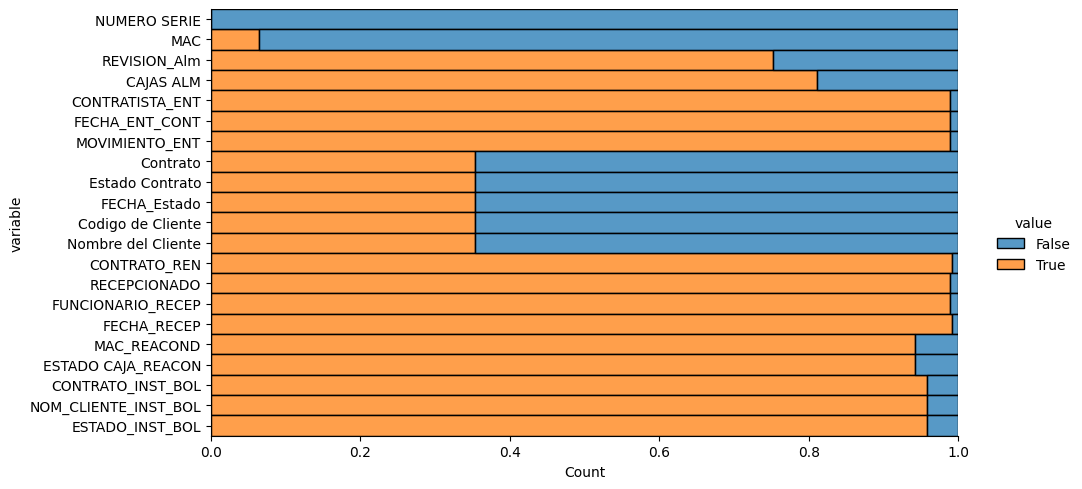

In [16]:
(
    df_deco_7000
    .isnull()
    .melt()
    .pipe( # pasa el resultado del dataframe a la siguiente funcion
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

<AxesSubplot: >

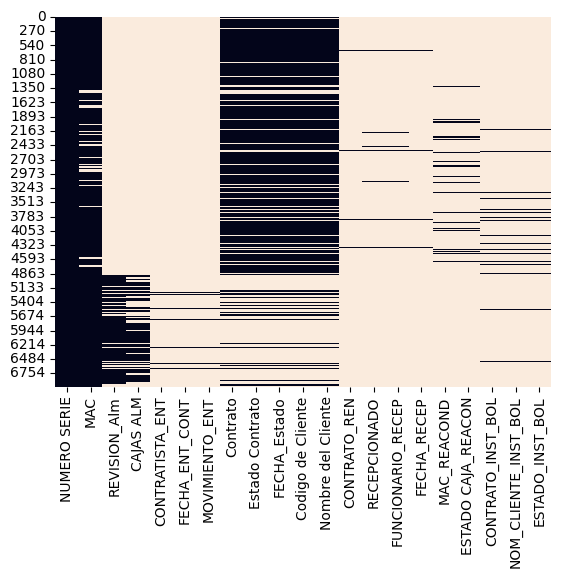

In [17]:
sns.heatmap(df_deco_7000.isnull(), cbar=False )

<AxesSubplot: >

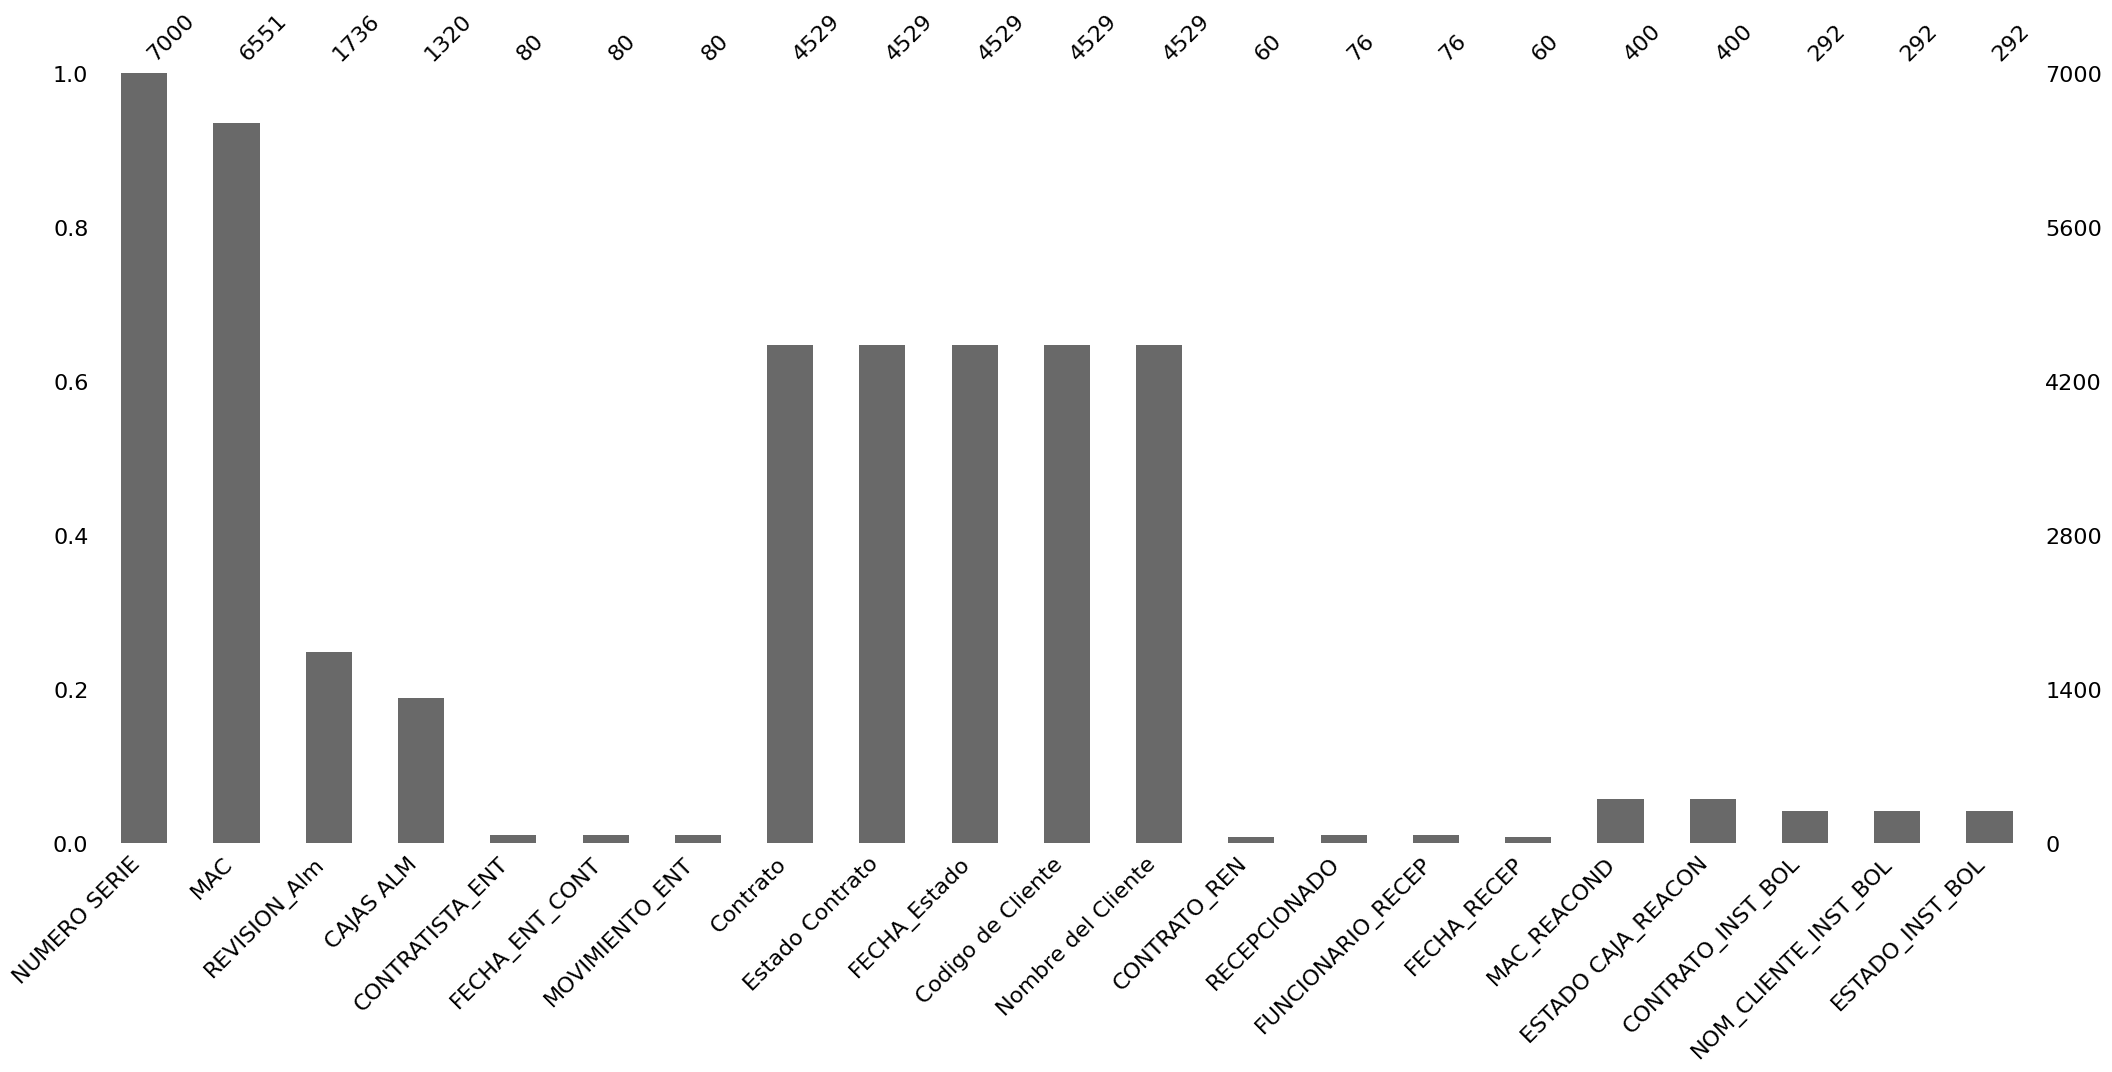

In [18]:
msno.bar(df= df_deco_7000)

<AxesSubplot: >

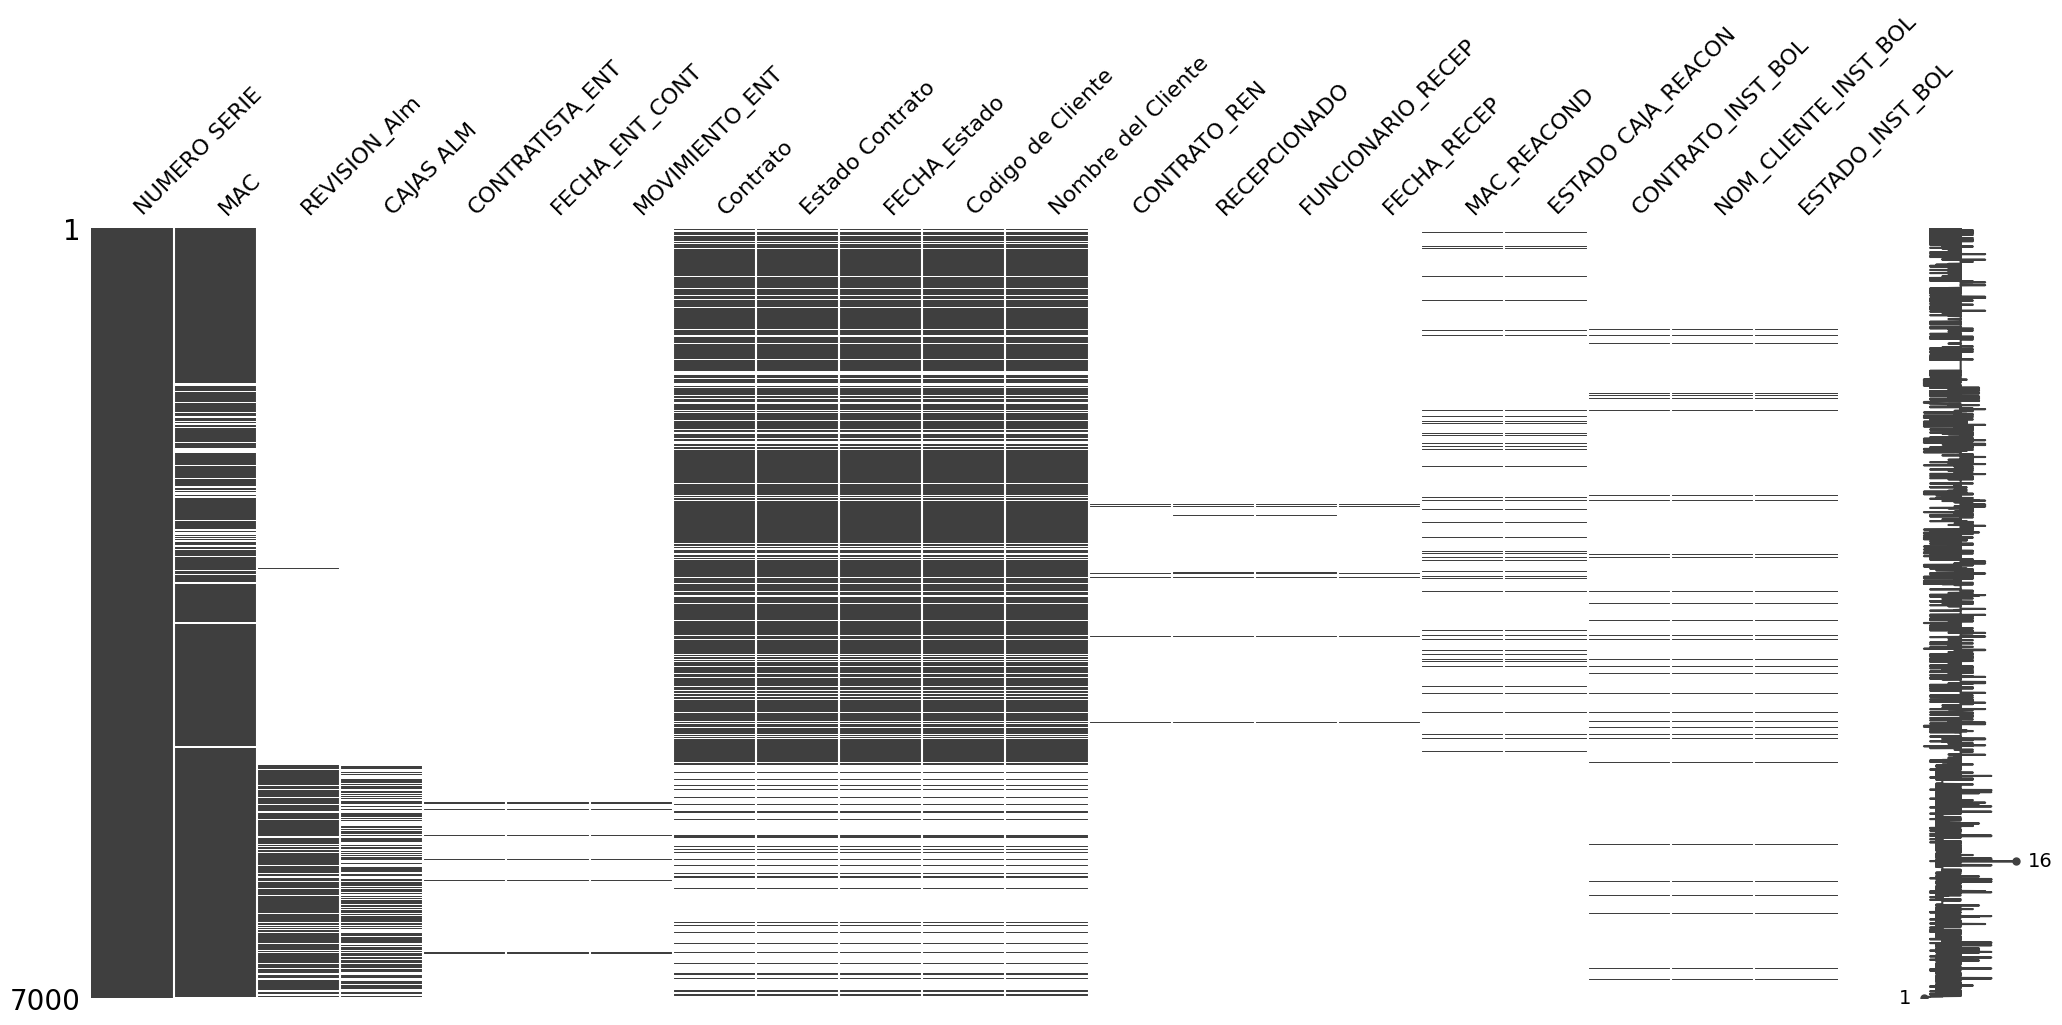

In [19]:
msno.matrix(df= df_deco_7000)

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

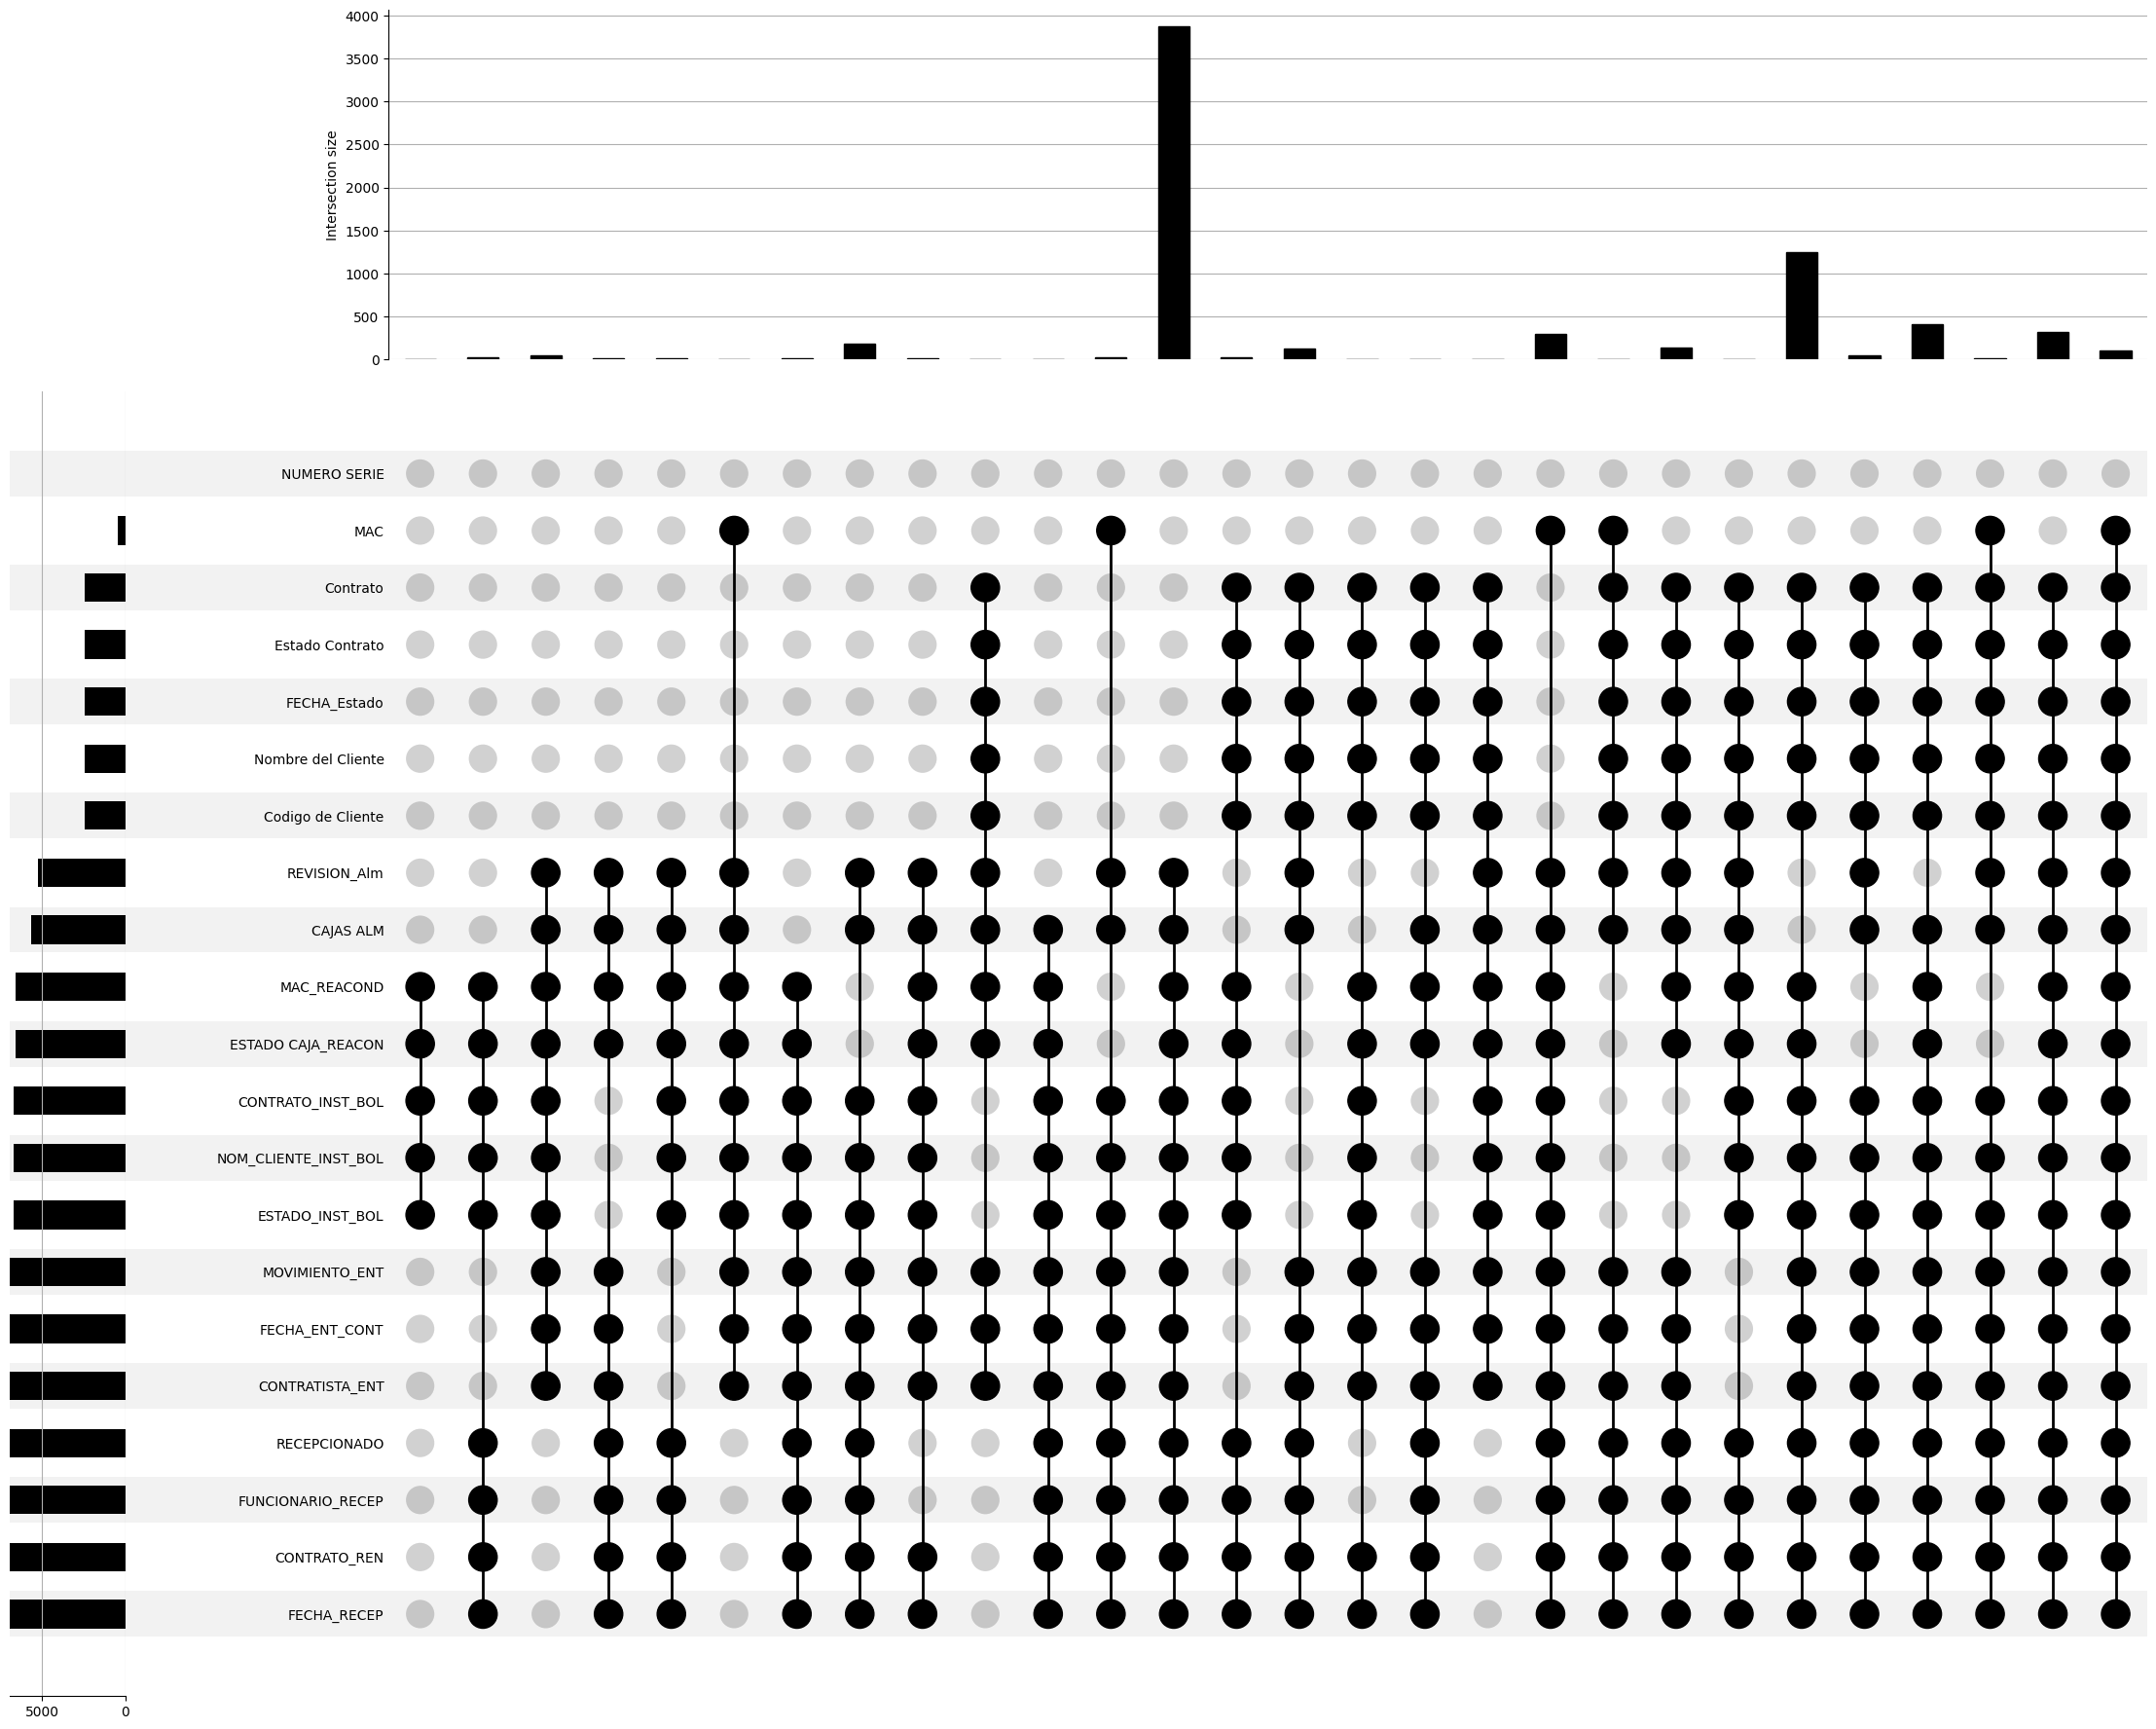

In [20]:
(
    df_deco_7000
    .missing
    .missing_upsetplot(
        variables=None, element_size= 60
    )
)

### Resumir el las columnas

In [21]:
df_deco_resum = df_deco_7000[["NUMERO SERIE","REVISION_Alm", "CONTRATISTA_ENT","Contrato","RECEPCIONADO","ESTADO CAJA_REACON","CONTRATO_INST_BOL"]]

### analizando segun lo resumido

<AxesSubplot: >

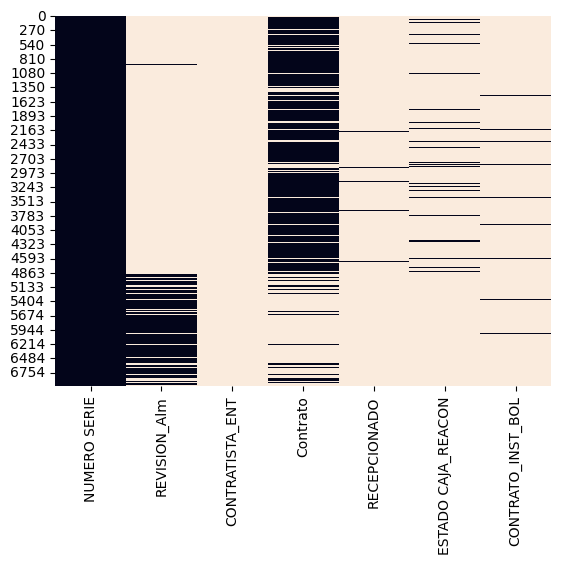

In [22]:
sns.heatmap(df_deco_resum.isnull(), cbar=False )

<AxesSubplot: >

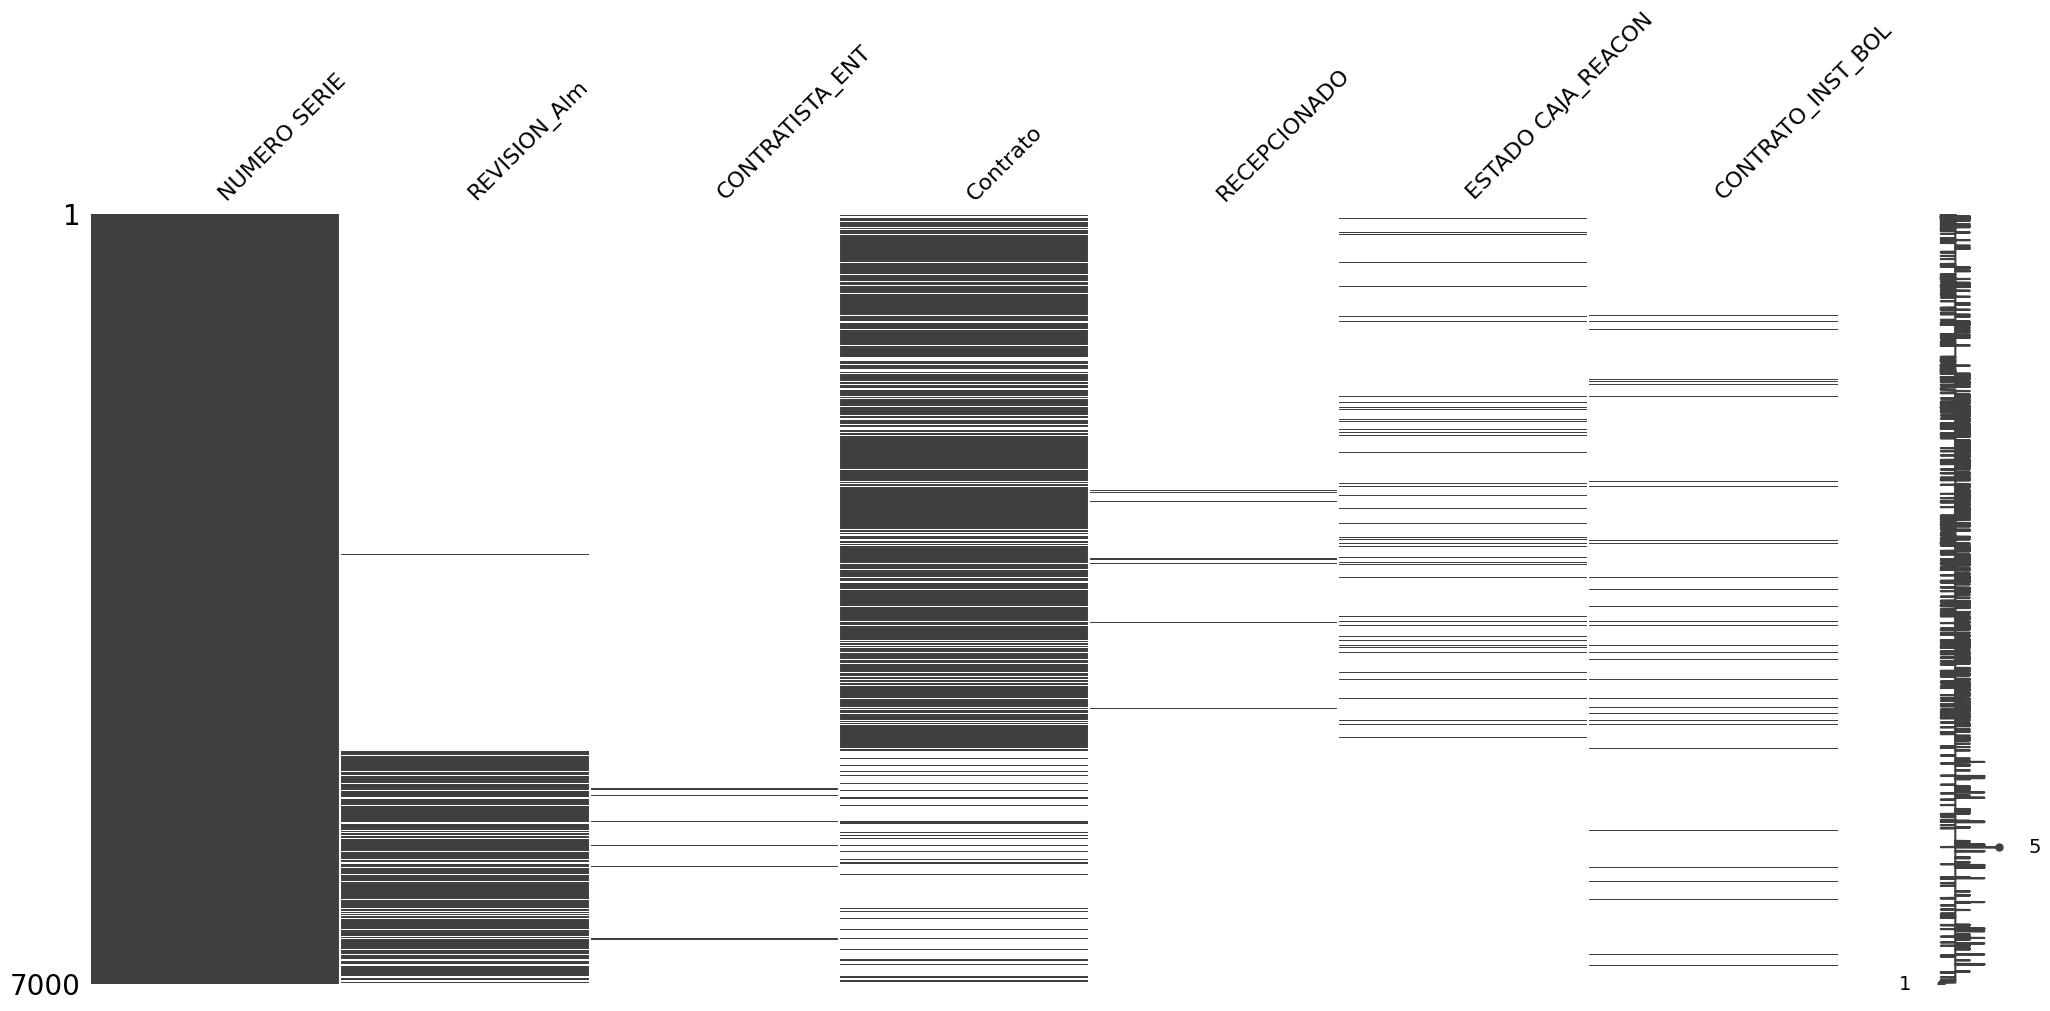

In [23]:
msno.matrix(df= df_deco_resum)

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

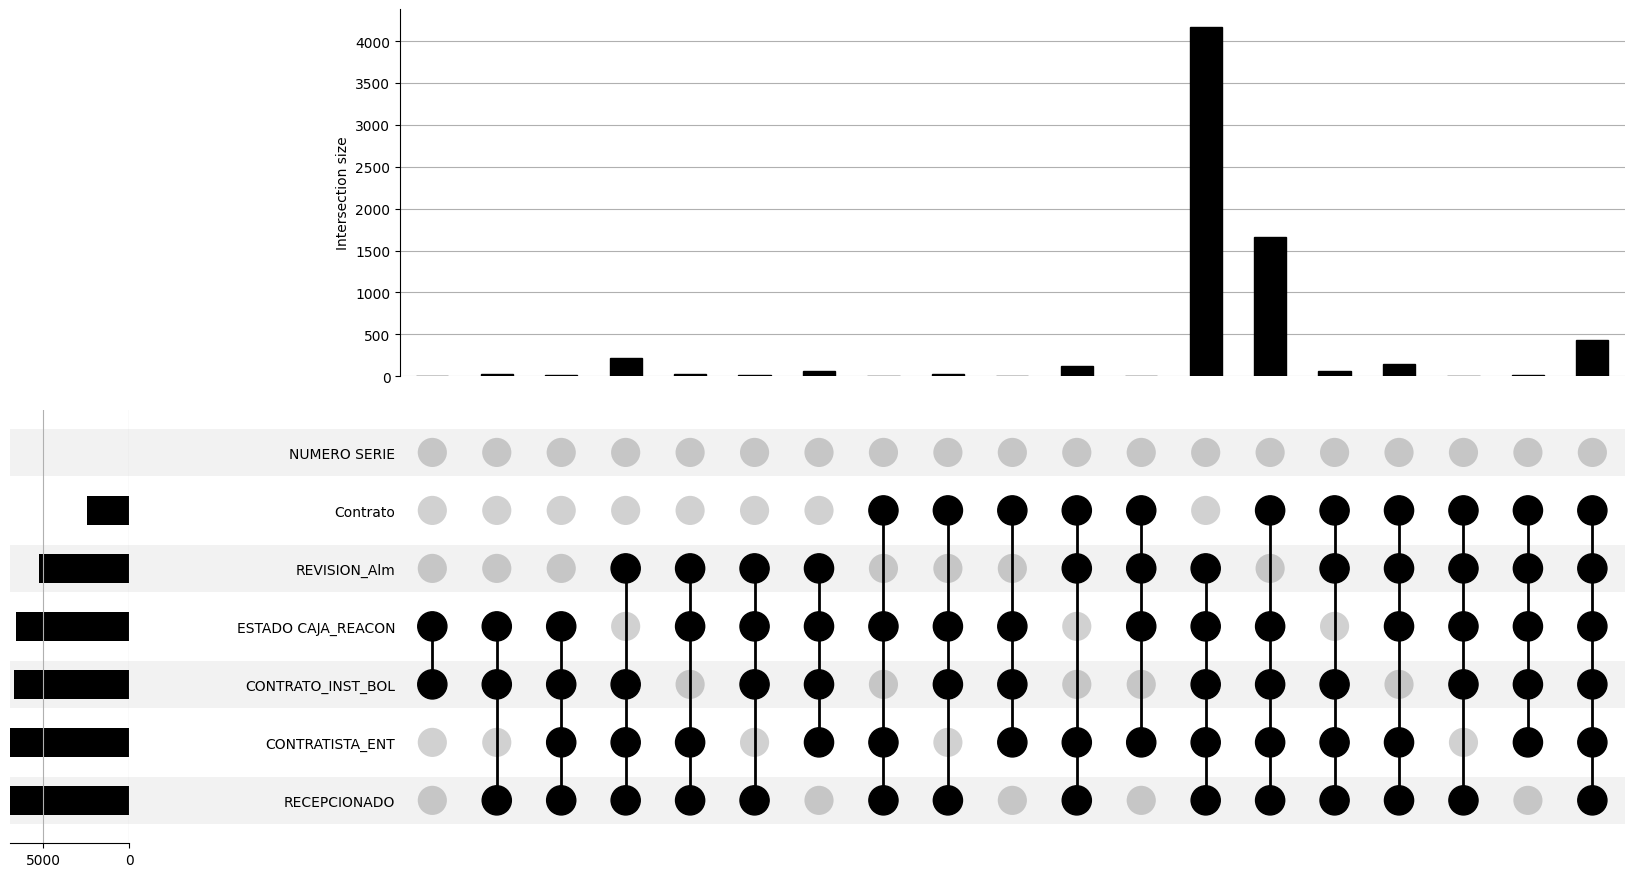

In [24]:
(
    df_deco_resum
    .missing
    .missing_upsetplot(
        variables=None, element_size= 60
    )
)


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

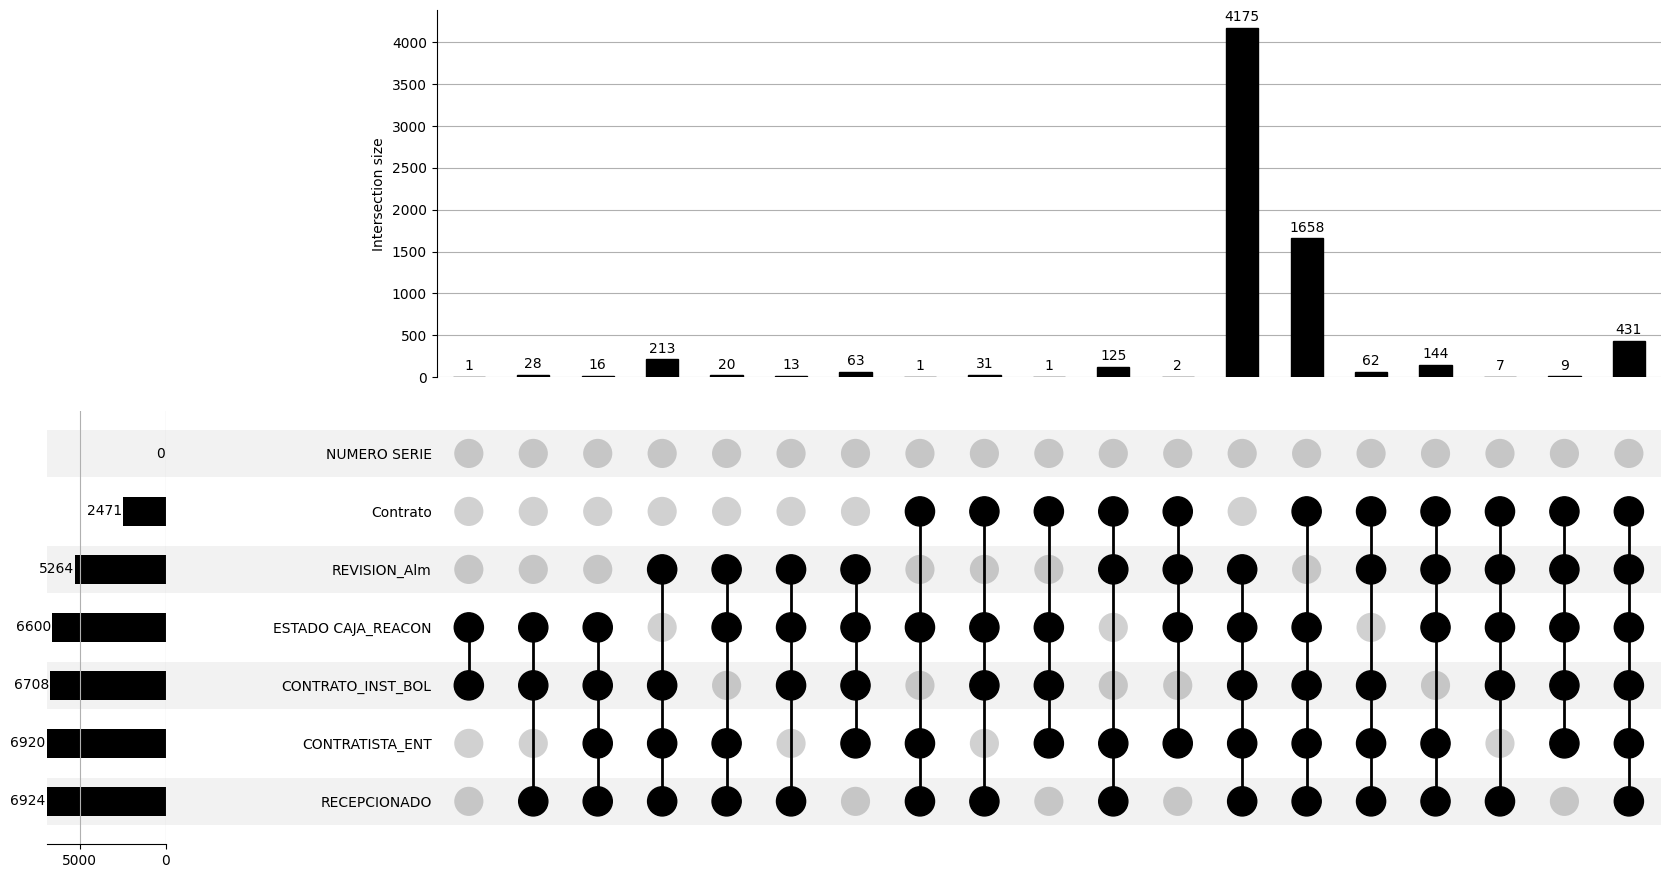

In [25]:
(
    df_deco_resum
    .missing
    .missing_upsetplot(
        variables=None, element_size= 60, show_counts=True
    )
)


In [26]:
df_dec_encontrados = df_deco_7000[df_deco_7000["REVISION_Alm"].notnull() | df_deco_7000["CONTRATISTA_ENT"].notnull() | df_deco_7000["Contrato"].notnull() | df_deco_7000["RECEPCIONADO"].notnull() | df_deco_7000["ESTADO CAJA_REACON"].notnull() | df_deco_7000["CONTRATO_INST_BOL"].notnull()]


In [27]:
df_dec_encontrados

,NUMERO SERIE,MAC,REVISION_Alm,CAJAS ALM,CONTRATISTA_ENT,FECHA_ENT_CONT,MOVIMIENTO_ENT,Contrato,Estado Contrato,FECHA_Estado,...,Nombre del Cliente,CONTRATO_REN,RECEPCIONADO,FUNCIONARIO_RECEP,FECHA_RECEP,MAC_REACOND,ESTADO CAJA_REACON,CONTRATO_INST_BOL,NOM_CLIENTE_INST_BOL,ESTADO_INST_BOL
0,20060025024720,FCD5D9536D2C,NaN,NaN,NaN,NaT,NaN,GT000029,BLQBI,2021-10,...,YOBANA CHOQUE CHOQUE,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,20060025000790,FCD5D9530FB2,NaN,NaN,NaN,NaT,NaN,GT001639,BLQBI,2021-10,...,RICARDO VIERA VARGAS,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
5,20060025026147,FCD5D95372BF,NaN,NaN,NaN,NaT,NaN,GT000316,NOR,2021-11,...,MIRTHA PARADA DE RAMIREZ,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
8,20060025021035,FCD5D9535EC7,NaN,NaN,NaN,NaT,NaN,GT001635,NOR,2021-10,...,DOLLY MELODIA CASTEDO ALVIS,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
9,20060025021088,FCD5D9535EFC,NaN,NaN,NaN,NaT,NaN,GT001617,REN,2021-10,...,HUGO JESUS ROMERO HEREDIA,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,20060025021659,FCD5D9536137,Nuevo,2449.0,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
6988,20060025021621,FCD5D9536111,Nuevo,2451.0,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
6989,20060025021631,FCD5D953611B,Nuevo,2451.0,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
6990,20060025023636,FCD5D95368F0,Nuevo,1932.0,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


### Res: 6569 decos se tiene algun Rastro

creacion de un df Resumen de los Encontrados

In [28]:
rf_dec_si_encon_resum = df_dec_encontrados[["NUMERO SERIE","REVISION_Alm", "CONTRATISTA_ENT","Contrato","RECEPCIONADO","ESTADO CAJA_REACON","CONTRATO_INST_BOL"]]

### visualizacion de los 6569 deco encontrados

<AxesSubplot: >

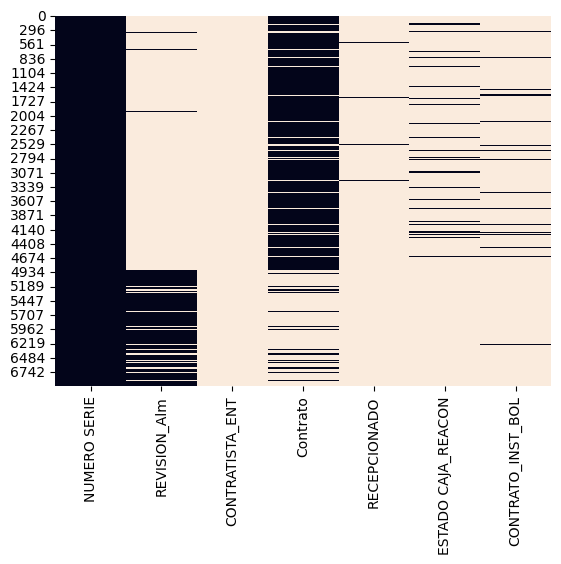

In [29]:
sns.heatmap(rf_dec_si_encon_resum.isnull(), cbar=False )

<AxesSubplot: >

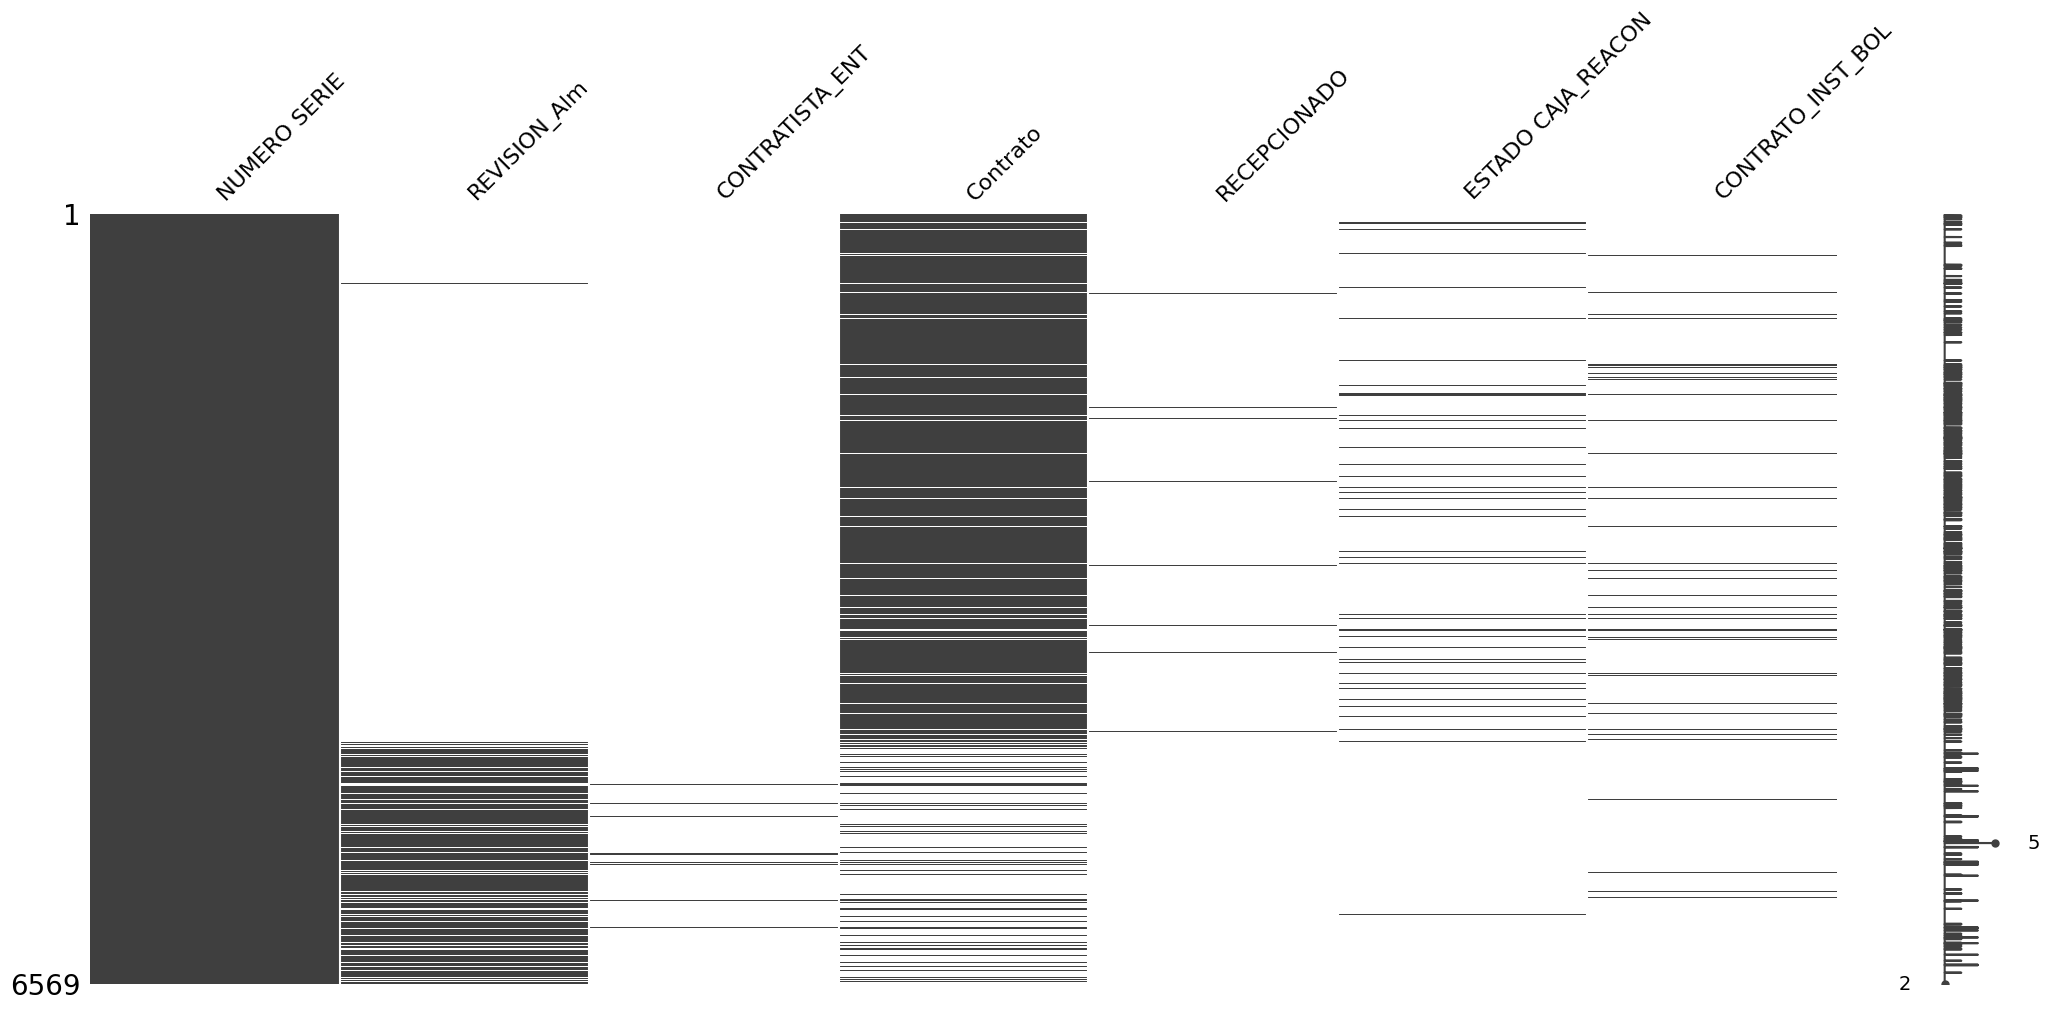

In [30]:
msno.matrix(df= rf_dec_si_encon_resum)

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

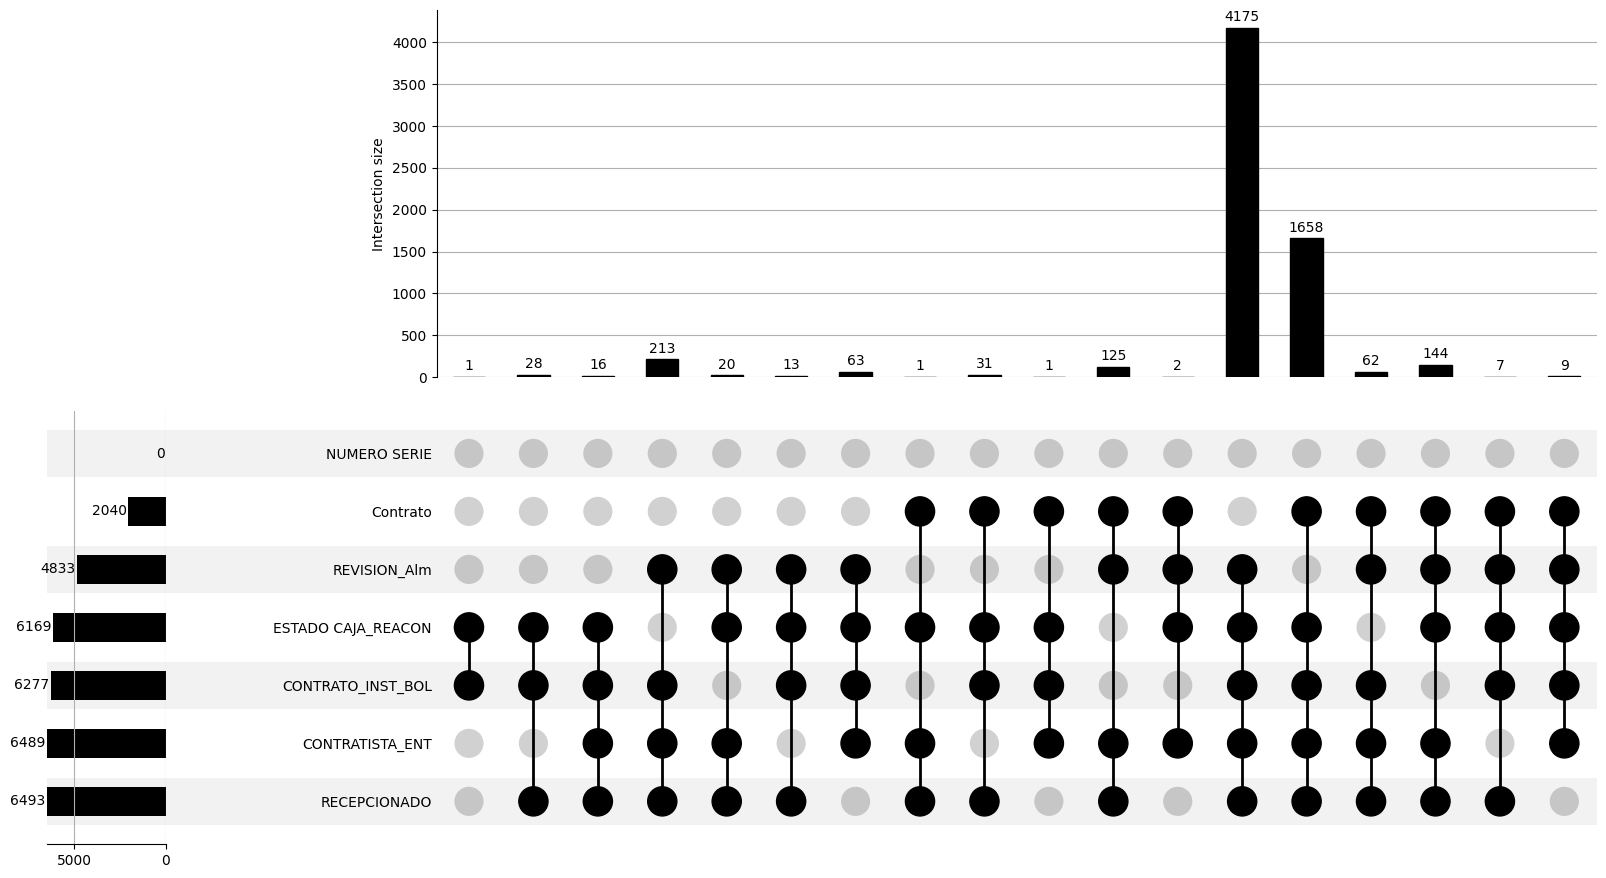

In [31]:
(
    rf_dec_si_encon_resum
    .missing
    .missing_upsetplot(
        variables=None, element_size= 60, show_counts=True
    )
)

### Busqueda de los DECO no encontrados

In [32]:
df_dec_no_encont = df_deco_7000[df_deco_7000["REVISION_Alm"].isnull() & df_deco_7000["CONTRATISTA_ENT"].isnull() & df_deco_7000["Contrato"].isnull() & df_deco_7000["RECEPCIONADO"].isnull() & df_deco_7000["ESTADO CAJA_REACON"].isnull() & df_deco_7000["CONTRATO_INST_BOL"].isnull()]

In [33]:
df_dec_no_encont

,NUMERO SERIE,MAC,REVISION_Alm,CAJAS ALM,CONTRATISTA_ENT,FECHA_ENT_CONT,MOVIMIENTO_ENT,Contrato,Estado Contrato,FECHA_Estado,...,Nombre del Cliente,CONTRATO_REN,RECEPCIONADO,FUNCIONARIO_RECEP,FECHA_RECEP,MAC_REACOND,ESTADO CAJA_REACON,CONTRATO_INST_BOL,NOM_CLIENTE_INST_BOL,ESTADO_INST_BOL
2,20060025001449,FCD5D9531245,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,20060025022428,FCD5D9536438,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,20060025025796,FCD5D9537160,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
6,20060025026170,FCD5D95372D6,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7,20060025001854,FCD5D95313DA,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999,20060025001518,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7000,20060025001553,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7001,20060025001555,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7002,20060025002050,FCD5D953149E,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


### Resultado: 431 decos no se tiene Rastro

Creacion de resumen de los no encontrados

In [34]:
rf_dec_no_encon_resum = df_dec_no_encont[["NUMERO SERIE","REVISION_Alm", "CONTRATISTA_ENT","Contrato","RECEPCIONADO","ESTADO CAJA_REACON","CONTRATO_INST_BOL"]]

### Visualizacion de los 431 decos no encontrados

<AxesSubplot: >

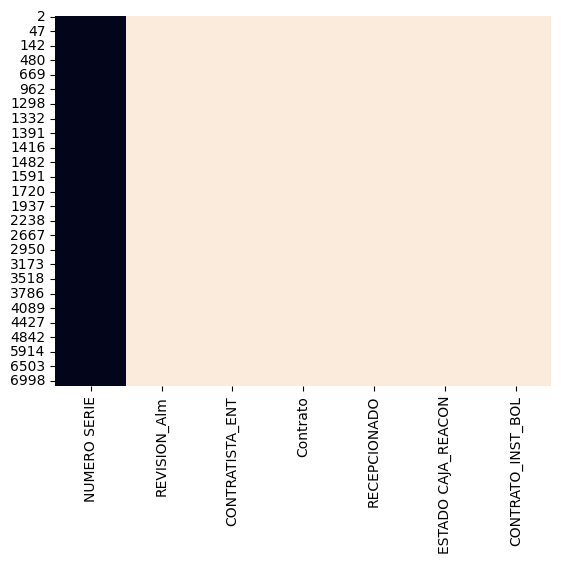

In [35]:
sns.heatmap(rf_dec_no_encon_resum.isnull(), cbar=False )

<AxesSubplot: >

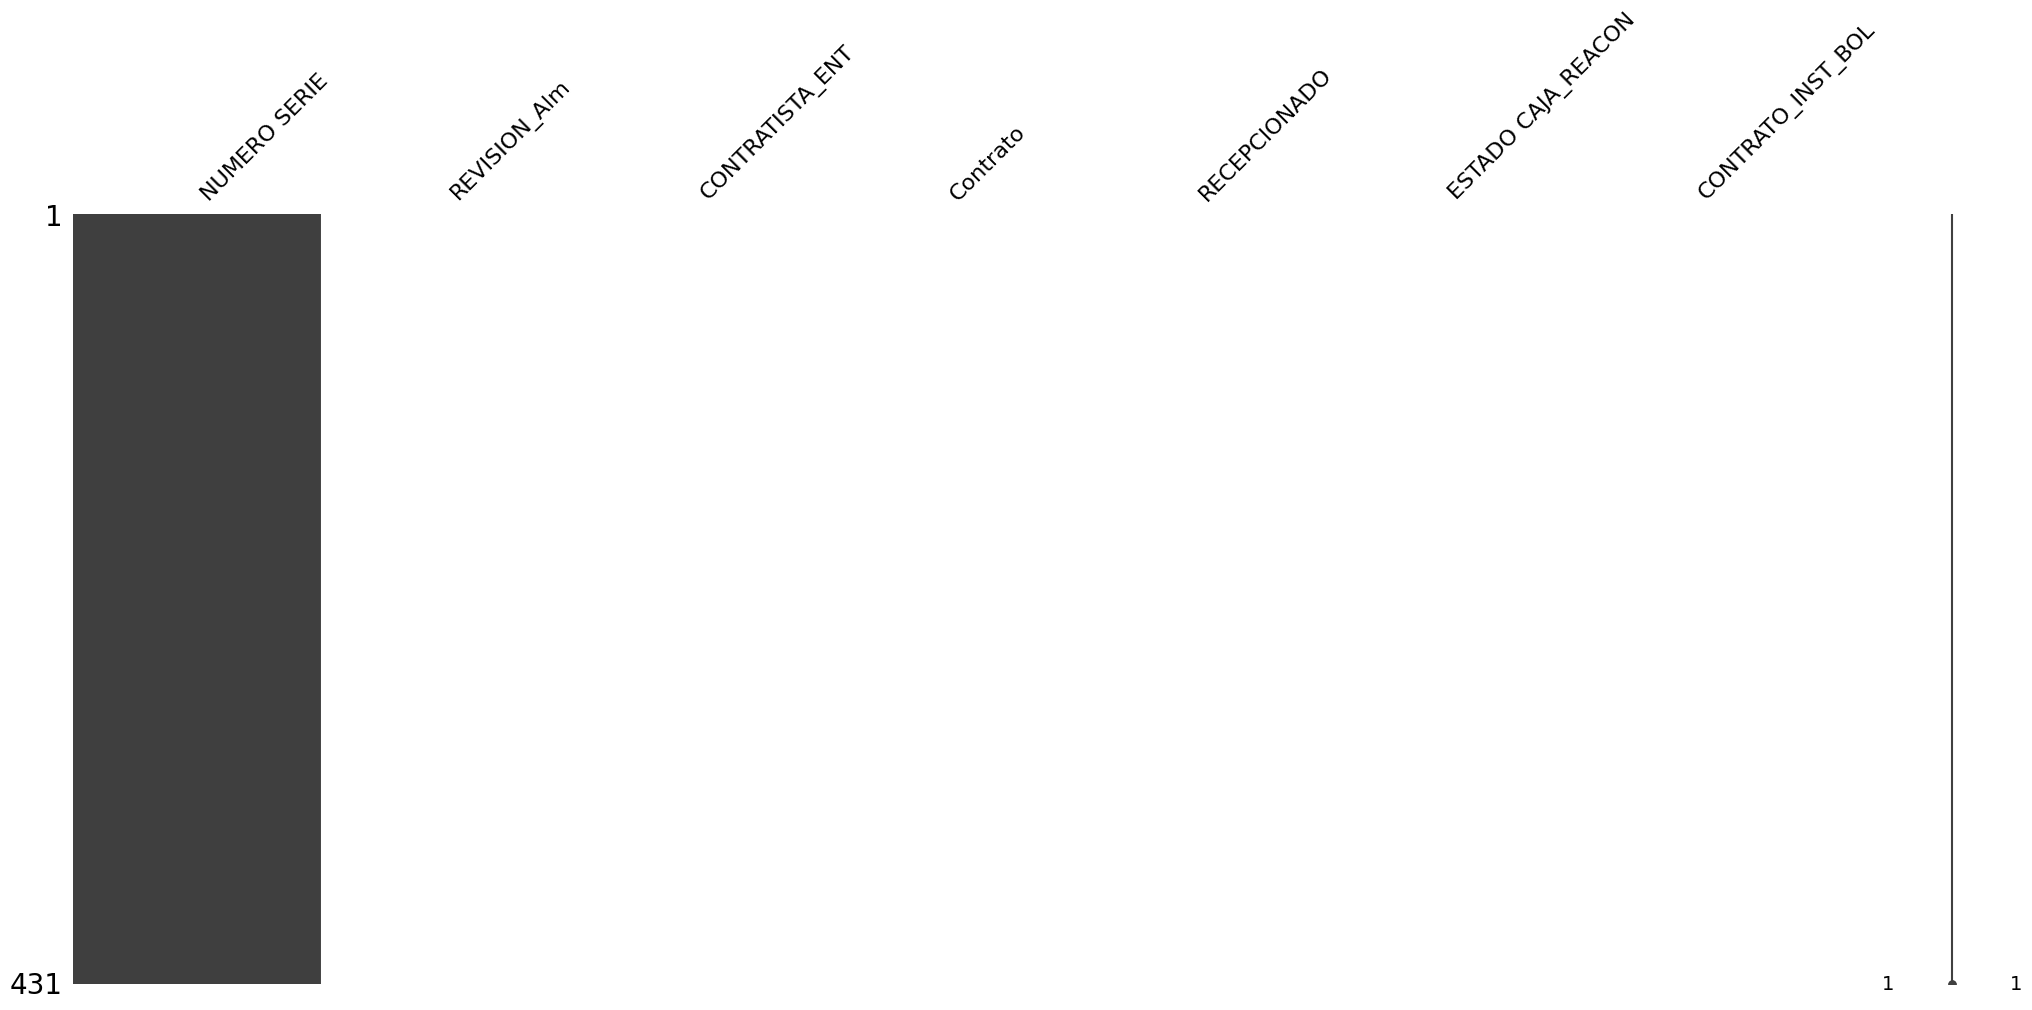

In [36]:
msno.matrix(df= rf_dec_no_encon_resum)

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

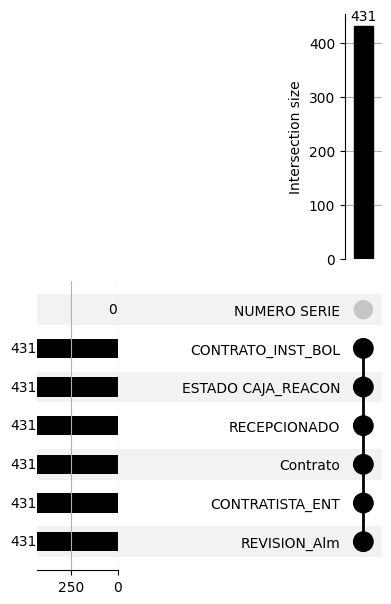

In [37]:
 (
    rf_dec_no_encon_resum
    .missing
    .missing_upsetplot(
        variables=None, element_size= 40, show_counts=True
    )
)

# RESUMEN:

## Seguimiento a Cajas Decodificadoras

In [38]:
%matplotlib inline

In [39]:
from matplotlib import pyplot as plt
from upsetplot import plot, from_indicators


Renombrar columnas de manera Explicita.

In [40]:
df_deco_resum = df_deco_resum.rename(columns={"REVISION_Alm":"Revision_Almacen", "CONTRATISTA_ENT":"entrega_contratista","Contrato":"contrato_CRM","RECEPCIONADO":"Recepcionado_oficina","ESTADO CAJA_REACON":"Reacondicionado","CONTRATO_INST_BOL":"Contrato_Boleta"})

### Grafica resumen: Seguimiento Cajas Decodificadoras

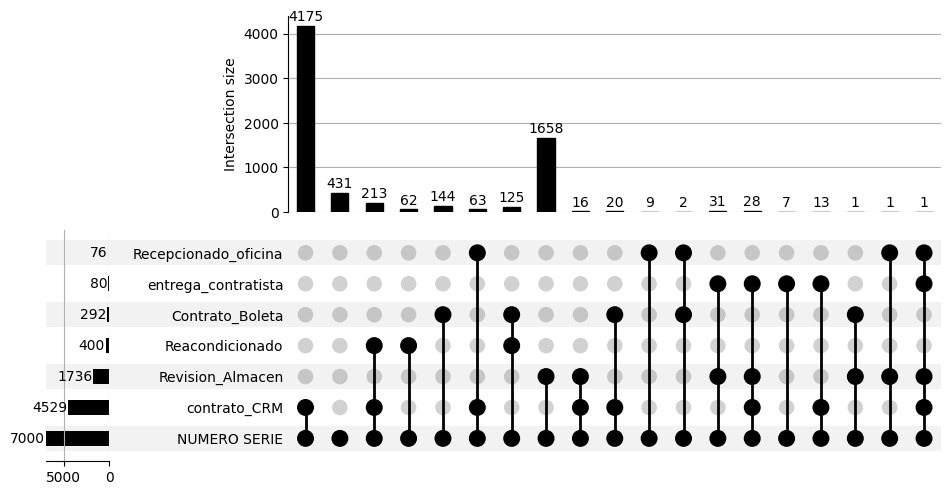

In [41]:
plot(from_indicators(indicators=pd.notna, data=df_deco_resum), show_counts=True, sort_by=None)
plt.show()

### prueba para exportar

In [42]:
df_deco_resum.to_excel("prueba_resultado.xlsx")

In [43]:
df_dec_encontrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6569 entries, 0 to 6991
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   NUMERO SERIE          6569 non-null   int64         
 1   MAC                   6225 non-null   object        
 2   REVISION_Alm          1736 non-null   object        
 3   CAJAS ALM             1320 non-null   float64       
 4   CONTRATISTA_ENT       80 non-null     object        
 5   FECHA_ENT_CONT        80 non-null     datetime64[ns]
 6   MOVIMIENTO_ENT        80 non-null     float64       
 7   Contrato              4529 non-null   object        
 8   Estado Contrato       4529 non-null   object        
 9   FECHA_Estado          4529 non-null   object        
 10  Codigo de Cliente     4529 non-null   float64       
 11  Nombre del Cliente    4529 non-null   object        
 12  CONTRATO_REN          60 non-null     object        
 13  RECEPCIONADO      

In [44]:
df_deco_7000

,NUMERO SERIE,MAC,REVISION_Alm,CAJAS ALM,CONTRATISTA_ENT,FECHA_ENT_CONT,MOVIMIENTO_ENT,Contrato,Estado Contrato,FECHA_Estado,...,Nombre del Cliente,CONTRATO_REN,RECEPCIONADO,FUNCIONARIO_RECEP,FECHA_RECEP,MAC_REACOND,ESTADO CAJA_REACON,CONTRATO_INST_BOL,NOM_CLIENTE_INST_BOL,ESTADO_INST_BOL
0,20060025024720,FCD5D9536D2C,NaN,NaN,NaN,NaT,NaN,GT000029,BLQBI,2021-10,...,YOBANA CHOQUE CHOQUE,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,20060025000790,FCD5D9530FB2,NaN,NaN,NaN,NaT,NaN,GT001639,BLQBI,2021-10,...,RICARDO VIERA VARGAS,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,20060025001449,FCD5D9531245,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,20060025022428,FCD5D9536438,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,20060025025796,FCD5D9537160,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999,20060025001518,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7000,20060025001553,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7001,20060025001555,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7002,20060025002050,FCD5D953149E,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [45]:
df_deco_7000.to_excel("Result_7000_deco.xlsx")

In [46]:
rf_dec_si_encon_resum

,NUMERO SERIE,REVISION_Alm,CONTRATISTA_ENT,Contrato,RECEPCIONADO,ESTADO CAJA_REACON,CONTRATO_INST_BOL
0,20060025024720,NaN,NaN,GT000029,NaN,NaN,NaN
1,20060025000790,NaN,NaN,GT001639,NaN,NaN,NaN
5,20060025026147,NaN,NaN,GT000316,NaN,NaN,NaN
8,20060025021035,NaN,NaN,GT001635,NaN,NaN,NaN
9,20060025021088,NaN,NaN,GT001617,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6987,20060025021659,Nuevo,NaN,NaN,NaN,NaN,NaN
6988,20060025021621,Nuevo,NaN,NaN,NaN,NaN,NaN
6989,20060025021631,Nuevo,NaN,NaN,NaN,NaN,NaN
6990,20060025023636,Nuevo,NaN,NaN,NaN,NaN,NaN


In [47]:
df_dec_encontrados.to_excel("Result_decos_encontrados.xlsx")

In [48]:
rf_dec_no_encon_resum.to_excel("Result_decos_no_encontrado.xlsx")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c27724ae-db21-4845-abf1-d703951df3c7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>